<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/17%20-%20Pandas%20(les%20Bases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17/30 Pandas (les Bases) Et Analyse du Titanic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Charger vos données dans un DataFrame Pandas

https://www.youtube.com/redirect?q=http%3A%2F%2Fbiostat.mc.vanderbilt.edu%2Fwiki%2Fpub%2FMain%2FDataSets%2Ftitanic3.xls&redir_token=IS7fnKxJQSAQBgyL_W_n-Yg2XZJ8MTU4NzkxOTk0MkAxNTg3ODMzNTQy&v=zZkNOdBWgFQ&event=video_description


Les options les plus courantes :
- read_csv
- read_excel



In [21]:
data = pd.read_excel('Dataset/titanic.xls')

In [23]:
data.shape
#data.head()

(1309, 14)

In [24]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## 2. Nettoyer votre Dataset avec drop(), dropna() et fillna()

In [25]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [26]:
data = data.dropna(axis=0)
data.shape

(1046, 4)

<AxesSubplot:>

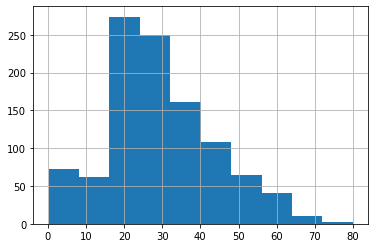

In [27]:
data['age'].hist()

## 3. Groupby() et value_counts()

In [28]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [29]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [30]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

In [31]:
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

## 4. Exercice
- Créer des catégories d'ages avec la fonction map() de pandas
- Créer des catégories de genres avec cat.codes

In [32]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

In [33]:
data['age'] = data['age'].map(category_ages)

In [34]:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

In [35]:
data

,pclass,survived,sex,age
0,1,1,female,20-30 ans
1,1,1,male,<20 ans
2,1,0,female,<20 ans
3,1,0,male,20-30 ans
4,1,0,female,20-30 ans
...,...,...,...,...
1301,3,0,male,+40 ans
1304,3,0,female,<20 ans
1306,3,0,male,20-30 ans
1307,3,0,male,20-30 ans
